Nate, Erik, and Jake

Group BadJ

HW 9

In [37]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import statsmodels.api as sm

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

rand_state = 1000

In [8]:
#Pulling in the data
df = pd.read_csv ('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/fall22/data/HW_data/HW9/bikeshare.csv')
df.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.334609,0.947345,-1.553844,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,1


In [9]:
#I have been giggling too much, so I'm renaming this variable.
df['count'] = df['cnt']

In [10]:
#Ordinal Encoding the Categorical Features
df = df.drop(['dteday','cnt'], axis=1)
ordinal_categoricals = ['season','yr', 'mnth','hr','holiday','weekday','notbizday','weathersit' ]
enc = OrdinalEncoder()
df[ordinal_categoricals]= enc.fit_transform(df[ordinal_categoricals])
df.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,count
0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,-1.334609,0.947345,-1.553844,16
1,0.0,0.0,0.0,1.0,0.0,6.0,1.0,0.0,-1.438475,0.895513,-1.553844,40
2,0.0,0.0,0.0,2.0,0.0,6.0,1.0,0.0,-1.438475,0.895513,-1.553844,32
3,0.0,0.0,0.0,3.0,0.0,6.0,1.0,0.0,-1.334609,0.636351,-1.553844,13
4,0.0,0.0,0.0,4.0,0.0,6.0,1.0,0.0,-1.334609,0.636351,-1.553844,1


In [11]:
enc.categories_

[array([1, 2, 3, 4]),
 array([0, 1]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([0, 1]),
 array([1, 2, 3, 4])]

It looks like the categorical variables were already encoded, so we didn't need to encode them.

#Q1: Regression

##1

In [12]:
#Defining the target and features, and splitting the data.
y = df['count']
X = df.drop('count', axis=1) # becareful inplace= False
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

##2.1

In [13]:
#Training the model.
RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=1000)

###2.2 & 2.3

In [14]:
y_hat = RF_regression.predict(X_test)
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
4495,26,21.38
4418,47,64.21
7141,11,4.91
14765,205,199.84
16541,65,80.55


###2.4 

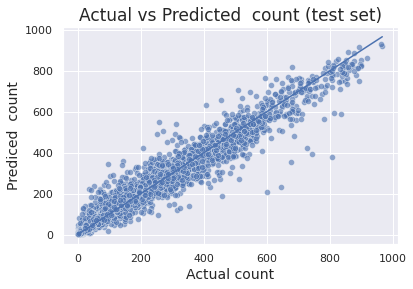

In [15]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

We are pleased with this visualization as our model (line) looks like it's capturing the data pattern well. 

###2.5

In [16]:
#Reporting R squared
np.round(RF_regression.score(X_test, y_test),4)

0.9488

In [17]:
#Reporting MSE
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

41.82

##3 

In [18]:
my_param_grid = {'n_estimators':[100,200], 'max_features':['log2', 'auto'], 'max_depth':[10,None]} 
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   0.8s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   0.8s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   0.6s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   0.7s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   0.7s
[CV] END ..max_depth=10, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END ..max_depth=10, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END ..max_depth=10, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END ..max_depth=10, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END ..max_depth=10, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=   1.9s
[CV] END ..max_depth=10, max_features=auto, n_est

KeyboardInterrupt: ignored

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [64]:
RF_regression_opt = RandomForestRegressor(random_state=rand_state, max_depth=None,max_features='auto',n_estimators=200)
RF_regression_opt.fit(X_train, y_train)
print(np.round(RF_regression_opt.score(X_test, y_test),4))
print('-----')
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
print(RMSE_test)

0.7536
-----
0.17


It looks like our grid selection for our grid search CV was not better than just the default values. The only selection that the grid search did was to set the number of trees to 200. That performed almost identically, but slightly worse, to the model we trained in the beginning. With the max depth parameter set to None, our model is potentially making some very bushy trees.

##4

In [58]:
R2 = cross_val_score(estimator = RandomForestRegressor(max_depth=None, max_features='auto', n_estimators=200), X = X_train, y = y_train, cv = 5 , scoring="r2" )

In [59]:
R2_CV = round(np.mean(R2),4)
R2_CV

0.7451

In [60]:
RF_oob = RandomForestRegressor(max_depth=None, max_features='auto', n_estimators=200, oob_score=True)
RF_oob.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, oob_score=True)

In [61]:
RF_oob.oob_score_

0.7541923362326158

It looks like our CV and OOB results are pretty close to the results we got from using the test set. Overall the model is doing pretty well at predicting the number of people riding bikes in NYC.

##5

In [65]:
features = list(X_train.columns)
importance = RF_regression_opt.feature_importances_
FIM = pd.DataFrame({'Features': features, 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
4,holiday,0.011135
7,weathersit,0.019646
0,season,0.022733
10,windspeed,0.039008
5,weekday,0.039291
2,mnth,0.039943
1,yr,0.041215
9,hum,0.085098
6,notbizday,0.162853
8,temp,0.181032


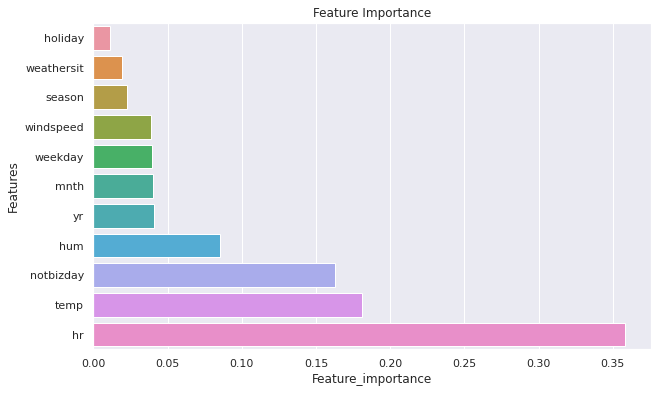

In [66]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

In [67]:
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_wc)
statsmodels_reg= model.fit()
statsmodels_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               overload   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     120.7
Date:                Fri, 11 Nov 2022   Prob (F-statistic):          1.85e-263
Time:                        05:26:24   Log-Likelihood:                -224.62
No. Observations:               12165   AIC:                             473.2
Df Residuals:                   12153   BIC:                             562.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0210      0.007     -2.836      0.005      -0.036      -0.006
season         0.0121      0.004      3.279      0.001       0.005       0.019
yr             0.0970      0.005     21.551      0.000       0.088       0.106
mnth          -0.0003      0.001     -0.254      0.799      -0.003       0.002
hr             0.0028      0.000      8.244      0.000       0.002       0.003
holiday       -0.0302      0.014     -2.191      0.028      -0.057      -0.003
weekday        0.0003      0.001      0.264      0.792      -0.002       0.002
notbizday     -0.0035      0.005     -0.695      0.487      -0.013       0.006
weathersit    -0.0066      0.004     -1.662      0.097      -0.014       0.001
temp           0.0395      0.002     16.423      0.000       0.035       0.044
hum           -0.0255      0.003     -9.259      0.000      -0.031      -0.020
windspeed      0.0059      0.002      2.489      0.013       0.001       0.011
==============================================================================
Omnibus:                     6785.562   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40076.077
Skew:                           2.778   Prob(JB):                         0.00
Kurtosis:                       9.943   Cond. No.                         91.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our 5 most *important* features are: hr, temp, notbizday, yr, hum and yr. Our 5 most *significant* features are hr, temp, hum, yr, and season. 

It looks like notbizday is not very significant at all, but it's 4th on our list of feature importance. This probably means that notbizday has a non-linear relationship with the number of people riding bikes that is being picked up in random forest, but it is being misspecified in the linear model.

#Q2: Classification


##1

In [21]:
df['overload'] = np.where(df['count']>500,1,0)

In [22]:
df.drop('count', axis=1, inplace = True)

In [23]:
pd.crosstab(df['overload'],df['overload'], normalize='all')*100

overload,0,1
overload,,
0,92.640543,0.000000
1,0.000000,7.359457


Our data is highly imbalanced, with 7% of observations falling under the target variable

##2.

In [24]:
y = df['overload']
X = df.drop('overload', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

##3.1

In [27]:
RF_classifier = RandomForestClassifier(random_state=rand_state)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

###3.2

In [28]:
#  Test set classes 
y_hat      = RF_classifier.predict(X_test)
# test set probabilities
y_hat_probs = RF_classifier.predict_proba(X_test)[:,1] 


###3.3 INTERPRET

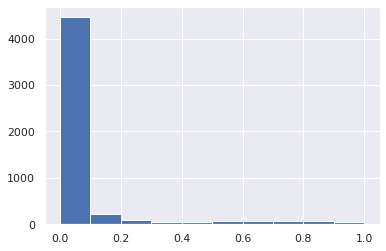

In [29]:
plt.hist(y_hat_probs)
plt.show()

our model always predicts positive above a 0.1 threshold

###3.4

In [ ]:
print(confusion_matrix(y_test, y_hat))

In [32]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4819
           1       0.89      0.71      0.79       395

    accuracy                           0.97      5214
   macro avg       0.93      0.85      0.89      5214
weighted avg       0.97      0.97      0.97      5214



Our model is accruately classifying our target variable as pos/neg 97 oof the time.Because our data is imbalanced, accuracy is not as reliable.  

The precision of the model is 0.89, indicating that we are doing ok limiting false positives.Our recall is slightly lower at 0.71, so we're letting the mdel identify false negatives more often. This exposes us to the risk of under-upplying bikes, because we will predict no overload when there actually is one. 
. 

##4

In [34]:
my_param_grid = {'n_estimators':[100,200], 'criterion':['gini','entropy'],  'max_features':['log2', 'auto'], 'max_depth':[10,None]}

In [35]:
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )


In [36]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=200; total time=   1.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=200; total time=   1.4s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=200; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=200; total ti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1000),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, None],
                         'max_features': ['log2', 'auto'],
                         'n_estimators': [100, 200]},
             verbose=2)

In [38]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 100}

In [39]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='log2',
                       random_state=1000)

In [40]:
y_hat_optimized = grid.predict(X_test)


In [41]:
print(confusion_matrix(y_test, y_hat_optimized))

[[4782   37]
 [ 100  295]]


In [45]:
print(classification_report(y_test, y_hat_optimized))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4819
           1       0.89      0.75      0.81       395

    accuracy                           0.97      5214
   macro avg       0.93      0.87      0.90      5214
weighted avg       0.97      0.97      0.97      5214



Our model's accuracy and precision stayed close to the same after hyperparameter tuning. We were able to increase recall/ limit false negatives, though. 

##5.

In [43]:
R2 = cross_val_score(estimator = RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=500), X = X_train, y = y_train, cv = 5 , scoring="r2" )

In [44]:
#5-fold cross-validated R^2
R2_CV = round(np.mean(R2),4)
R2_CV


0.6011

In [47]:
#Out-of-bag accuracy
RF_oob = RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=500, oob_score=True)
RF_oob.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=500,
                       oob_score=True)

In [48]:
RF_oob.oob_score_

0.9733662145499383

Our out-of-bag accuracy is quite high at over 97%. Cross-validated accuracy is lower than what we had previously estimated at 60.11%.

##6.Imbalanced Data

In [49]:
RF_balanced = RandomForestClassifier(random_state=1000, criterion='entropy', max_features='log2', max_depth=10, class_weight='balanced_subsample')

In [50]:
y_hat_balanced = RF_balanced.fit(X_train, y_train).predict(X_test)

In [51]:
print(classification_report(y_test, y_hat_balanced))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4819
           1       0.46      0.93      0.61       395

    accuracy                           0.91      5214
   macro avg       0.73      0.92      0.78      5214
weighted avg       0.95      0.91      0.92      5214



Using a balanced random forest classifier, our accuracy decreased slightly but we were able to increase recall and further limit false negatives. This makes sense because our unbalanced data could have hgher acuracy just by predicting negatives because it is so much more of the data, so now we need to give them more attention 

##7.

No Skill     : ROC AUC=0.500
Random Forest: ROC AUC=0.979


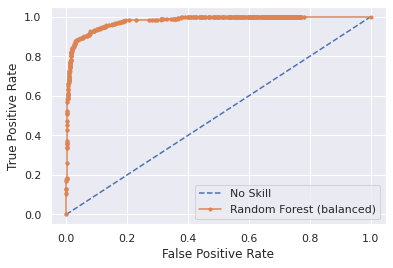

In [52]:
# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = RF_balanced.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill     : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest (balanced)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Our AUC is 97.9%, and we can trust it because we are using a balanced version of the RF model. 

##8

In [54]:
features = list(X_train.columns)
features

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'notbizday',
 'weathersit',
 'temp',
 'hum',
 'windspeed']

In [55]:
importance = RF_balanced.feature_importances_
importance

array([0.0352991 , 0.16001634, 0.04702932, 0.44763097, 0.00322157,
       0.0305151 , 0.04063593, 0.01335764, 0.12799231, 0.06838661,
       0.0259151 ])

In [57]:
fi = pd.DataFrame({'Features': features , 'Feature_importance':importance})
fi = fi.sort_values(by=['Feature_importance'])
fi

,Features,Feature_importance
4,holiday,0.003222
7,weathersit,0.013358
10,windspeed,0.025915
5,weekday,0.030515
0,season,0.035299
6,notbizday,0.040636
2,mnth,0.047029
9,hum,0.068387
8,temp,0.127992
1,yr,0.160016


Our most important features are holiday, weathersit (), windspeed (), weekday (), and season. This follows, because traffic and tourism is probably a lot higher in the city during holidays. Weather also makes a lot of sense to predict whether people are outside riding bikes, and weathersit r windspeed categorize weather more specifically and accurately than temperature or humidity. This also follows to why season is important, with similar weather patterns throughouot a season. 

In [ ]:
#Convert to html file

%%shell
jupyter nbconvert --to html /content/HW_9_Random_Forest.ipynb